# Training Dataset Analysis for KBQA System

This notebook analyzes the training dataset for a Knowledge Base Question Answering (KBQA) system to identify patterns, distributions, and areas for improvement.

## Methodology

The analysis includes:

- **Answer Length Analysis:** Identifying outliers and understanding answer length characteristics.
- **Short Answer Investigation:** Detecting potential noise or inconsistencies in short answers.
- **Question & Answer Categorization:** Grouping questions and answers into categories based on structure and content.
- **Topic Modeling:** Uncovering latent topics within questions and answers.
- **Keyword & Keyphrase Extraction:** Revealing important terms and concepts.

## Findings

- Most answers are concise, with a few outliers.
- Some short answers may indicate noise or incomplete information.
- Questions predominantly involve both numbers and letters.
- Answers typically consist of numbers, letters, or a combination.
- Topic modeling reveals topics related to publications, affiliations, and research areas.
- Keywords and keyphrases highlight terms related to authors, publications, universities, and research fields.




In [20]:
import json
import pandas as pd


# Load the JSON file
file_path = '../../../data/raw/dataset/raw_train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()


,id,question,answer,author_dblp_uri
0,6b8aa79c-3908-4f03-b85b-aa1a325d9fe6,What type of information sources were found to...,oral communication and notes,<https://dblp.org/pid/w/TDWilson>
1,339bfd44-a71f-4057-a8a2-c84e1cc2c6ff,What is the cited by count for the writer's in...,3335304,<https://dblp.org/pid/m/MichelaMilano>
2,5da8b8e9-1ef5-4217-a06c-06b12324c991,What was the focus of the author's undergradua...,probability and statistics,<https://dblp.org/pid/d/TGDietterich>
3,d808ca0f-9b70-47a6-9b96-fb8f75cf0f1a,Where did the author of SPAA 1999 - Guest Edit...,"Indian Institute of Technology, Madras",<https://dblp.org/pid/s/RameshKSitaraman>
4,85c79cd1-0c96-4efd-a5a8-3ade69885173,In which year did the author join Epic Games a...,2021,<https://dblp.org/pid/j/SimonLPeytonJones>


count    6011.000000
mean       14.807353
std        18.293098
min         0.000000
25%         4.000000
50%         9.000000
75%        19.000000
max       339.000000
Name: answer_length, dtype: float64


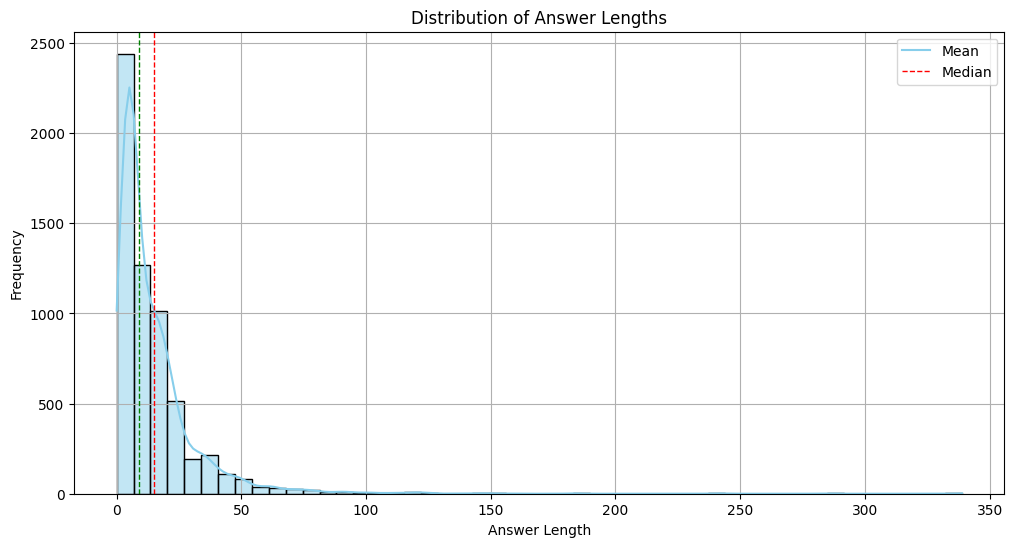

In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['answer_length'] = df['answer'].apply(len)

stats = df['answer_length'].describe()

print(stats)

plt.figure(figsize=(12, 6))
sns.histplot(df['answer_length'], bins=50, kde=True, color='skyblue')
plt.axvline(df['answer_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['answer_length'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.legend({'Mean': df['answer_length'].mean(), 'Median': df['answer_length'].median()})
plt.grid(True)
plt.show()


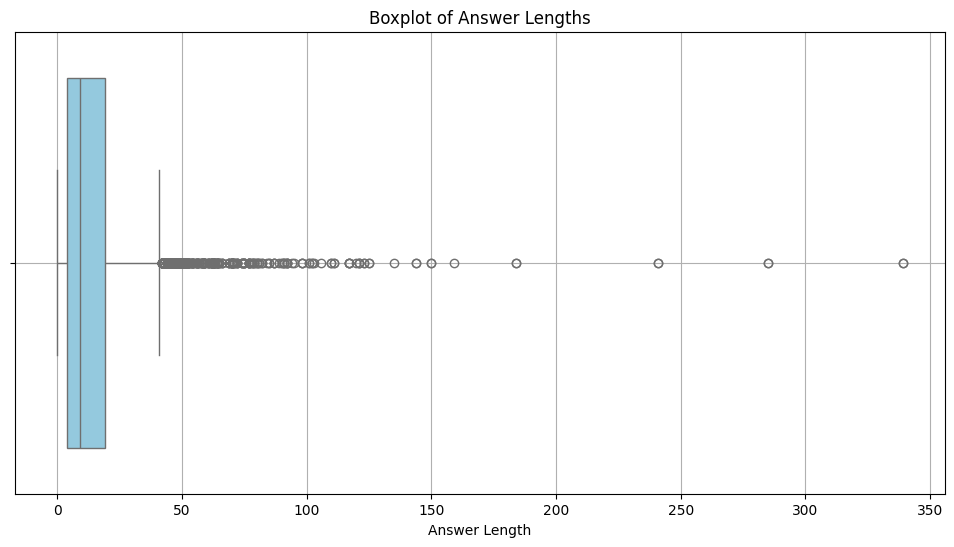

In [37]:
# Calculate the length of each answer
df['answer_length'] = df['answer'].apply(len)

# Create a statistics of answer lengths
stats = df['answer_length'].describe()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['answer_length'], color='skyblue')
plt.title('Boxplot of Answer Lengths')
plt.xlabel('Answer Length')
plt.grid(True)
plt.show()

# Determine the number of outliers
Q1 = df['answer_length'].quantile(0.25)
Q3 = df['answer_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['answer_length'] < lower_bound) | (df['answer_length'] > upper_bound)]
num_outliers = outliers.shape[0]



In [49]:
# Calculate the length of each answer
df['answer_length'] = df['answer'].apply(len)

# Filter answers with length less than 2
short_answers = df[df['answer_length'] < 3]

# Display the answers
print(f"Number of answers with length less than 2: {short_answers.shape[0]}")
print(short_answers[['id', 'question', 'answer', 'answer_length']])

Number of answers with length less than 2: 514
                                        id  \
11    cda20ff7-b955-42ef-81d5-d18a8b4e49a7   
27    007a1979-f034-4deb-88be-ca81527f2eda   
44    8f44b768-fad8-4633-bced-ad587b74dbc4   
65    22f99b04-4636-4e4e-91b5-390fbb5c7250   
73    7e111d49-1171-4033-a152-df2bf6e1f975   
74    6afeba89-d041-4bb1-9bb5-2b09c23dcb80   
95    c31a3456-890f-445b-b4aa-605ebe46990f   
119   73d5b8b8-e4e5-4bd2-ae9b-28e5691cf636   
136   ecf3d63a-8ff1-4a65-82d4-5c640e19337f   
140   053bf0a1-072e-4e9e-8887-496cb1fdc68a   
155   48878249-2c3c-4097-82d6-733caeea3e22   
172   5a8e57b4-a128-4e61-ab2c-06f7eff4ed3d   
178   b7572007-e17c-4738-95eb-a1881503c617   
217   e23952bb-4a18-486c-b70b-a4b82c923720   
230   3599343d-06b4-4546-9dd5-e24d9c64e603   
232   5740e84e-5d3f-410c-9177-7956f5c1b094   
235   cdc02e43-f564-43eb-b405-0627714ffc97   
241   c9fa0a2f-def4-4154-8f6f-5e2050befc8d   
247   09251e09-4064-458f-becd-7d3a27e1cacf   
250   a5bbb7c3-1cce-401e-92a5-8b3

Number of answers with length less than 2 and no numbers: 110
                                        id  \
44    8f44b768-fad8-4633-bced-ad587b74dbc4   
63    ef530a34-d6f6-42d7-be14-3c0ad4fabc72   
84    ce273f3a-6097-4252-bab8-45e5f4f1113b   
88    3be929c6-708f-46d0-888e-32145b188320   
464   8ae2a0ed-9de9-4e1c-93c0-5132ded23e4e   
487   71968ea3-b4c8-45d3-8089-e67775dd0e79   
680   cfbc9ad1-29bd-40f0-8e08-d3853a3b0fe2   
789   f5fde033-99a6-4a4f-a1c4-6948fc0b673d   
808   0e65a65c-615c-4b9a-9afc-4755fde89359   
958   bcfda993-6f8a-41a2-b989-6f20fbd409c7   
971   bd493b7a-a90e-490a-9b3c-055f5ee7b079   
987   c610073f-cf77-4f60-bdd4-0294cb91e426   
991   8ec05fcb-cae2-4ada-b783-19adbe2e424b   
1041  0b672099-9714-4417-9ce3-60f8211ebda5   
1043  786fec94-154d-4c35-af5e-43984fe8d052   
1088  dcfdd257-3db8-4e4e-a333-b38cbbdb4426   
1123  af3dcbca-2db7-44b6-b689-bca32fbab4af   
1263  7f0f777f-23e9-440c-af39-7a3849bf1ca7   
1287  2c53974a-3fc7-4037-8194-33f5d193740a   
1333  3eb9e026-18a

In [51]:
# Calculate the length of each answer
df['answer_length'] = df['answer'].apply(len)

# Filter answers with length less than 5
short_answers = df[df['answer_length'] < 5]

# Filter answers that do not contain numbers
short_answers_no_numbers = short_answers[~short_answers['answer'].str.contains(r'\d', na=False)]

# Sort the answers by their length
sorted_answers = short_answers_no_numbers.sort_values(by='answer_length')

# Generate an HTML table
html_table = sorted_answers[['id', 'question', 'answer', 'answer_length']].to_html()

# Display the HTML table in the Jupyter Notebook
display(HTML(html_table))


,id,question,answer,answer_length
5340,c0e2fbc6-b3ba-40cc-84e3-0038142e7d34,Who is the spouse of the creator of The distribution of Pearson residuals in generalized linear models article?,,0
1435,51926d87-0103-4632-bdf7-3c6af8964a8e,Name the award earned by the author of 'Acceleration of the Jacobi iterative method by factors exceeding 100 using scheduled relaxation'?,,0
1263,7f0f777f-23e9-440c-af39-7a3849bf1ca7,Who is the spouse of the creator of The distribution of Pearson residuals in generalized linear models article?,,0
987,c610073f-cf77-4f60-bdd4-0294cb91e426,Name the award earned by the author of 'Acceleration of the Jacobi iterative method by factors exceeding 100 using scheduled relaxation'?,,0
4845,5d646b27-111c-49a0-ae0a-15d6081b2680,In which city does the engineer with publications on Integral Histogram and Joint tracking and video registration work as a Chief Scientist at Global Technologies Lab?,C,1
1835,acf68288-1bfb-4220-97f1-fc0382995df8,What is the birth date of the electrical engineer specializing in statistical time-series analysis and statistical inference with an emphasis on signal processing algorithm design and performance analysis?,N,1
1947,f75bd261-fce9-41a5-8ab2-619418957237,"Where is the professor who published 'A Remark on ""Reducing Iteration Time when Result Digit is Zero for Radix-2 SRT Division and Square Root with Redundant Remainders""' from?",T,1
2132,9246c36d-9663-4a45-8883-c5e3429f06a1,Where was the Chinese engineer who authored The Potential for Estimating Snow Depth With QuikScat Data and a Snow Physical Model born?,B,1
2220,86f8be4b-bfbb-4ada-ac98-1c5d9a3f0c68,Where was the scholar who wrote the paper on Online and Differentially-Private Tensor Decomposition born?,M,1
2331,91d0931a-8394-4782-8c5b-09cc4dcc33f2,Where did the contributor of Admissibilization of Singular Interval-Valued Fuzzy Systems study?,U,1


In [5]:
import json
import pandas as pd
from IPython.display import display, HTML
import re
# Load new json file
file_path = '../../../data/processed/cleand_dataset/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df['answer_length'] = df['answer'].apply(len)
short_answers = df[df['answer_length'] < 5]
short_answers_no_numbers = short_answers[~short_answers['answer'].str.contains(r'\d', na=False)]
sorted_answers = short_answers_no_numbers.sort_values(by='answer_length')

html_table = sorted_answers[['id', 'question', 'answer', 'answer_length']].to_html()
display(HTML(html_table))

,id,question,answer,answer_length
5435,6bcd6ee5-7b7b-402f-b562-23e969771073,In which country was the author of 'Association vs. Prediction: The Impact of Cortical Surface Smoothing and Parcellation on Brain Age' raised?,UK,2
1415,07ce2d7f-e5c6-44dd-870d-049d64cf9fe1,What is the country of origin of the writer of Enhancement of Steady-State Performance in Direct-Torque-Controlled Dual Three-Phase Permanent-Magnet Synchronous Machine Drives With Modified Switching Table?,UK,2
1489,86875f33-a290-457a-8b90-629e7efa6f71,In which country was the author of 'Association vs. Prediction: The Impact of Cortical Surface Smoothing and Parcellation on Brain Age' raised?,UK,2
2858,016854a3-f20c-415f-9cde-b9267976b63e,Which institute granted a Ph.D. to the author of Locally Decodable Codes for edit distance in 1992?,MIT,3
3324,2cb39b2f-7fd0-49e3-a95a-1532fca09706,Where did the contributor of 'Evaluation of Texton Spatial Dependence Matrices for Breast Density Classification' initially work on shape analysis?,MIT,3
4230,08207a1b-465f-469f-bdef-1961882f687f,In which country did the author of 'Some shape definitions in fuzzy geometry of space' do his post-doc work from 1981-1982?,U.K,3
3042,f17a8c67-e659-400b-84df-6608f635a658,Which institute granted a Ph.D. to the author of Locally Decodable Codes for edit distance in 1992?,MIT,3
2811,37de5652-5626-48dc-b603-79e2217c1fdd,Where did the author of 'Machine Learning for Video-Based Rendering' hold a position as a research scientist from 1994 to 1996?,MIT,3
2741,f4753300-8f53-42ac-a88e-b35e340dd67b,Where did Jeffrey H. Shapiro receive his Ph.D. degree from?,MIT,3
3479,2b204352-5edd-4791-a696-de17e489da1d,Where did Jeffrey H. Shapiro receive his Ph.D. degree from?,MIT,3


In [4]:
import json
import pandas as pd
from IPython.display import display, HTML

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df['answer_length'] = df['answer'].apply(len)

# Sort the DataFrame by 'answer_length' in descending order and select the top 10
longest_answers = df.sort_values(by='answer_length', ascending=False).head(100)

# Display the top 10 longest answers
html_table = longest_answers[['id', 'question', 'answer', 'answer_length']].to_html()
display(HTML(html_table))

,id,question,answer,answer_length
5080,2f2c6a00-1e14-4176-9f62-6bf10ce7f606,What is the research interest of the scholar who published Process mining and simulation: a match made in heaven!?,"information systems, business process management, simulation, Petri nets, process models, workflow management systems, verification techniques, process mining, enterprise resource planning systems, computer supported cooperative work, web services, business process redesign, resource allocation, and interorganizational business processes",339
5861,680d1e04-4b2f-4016-96c8-2ec2ad015724,What is the research interest of the scholar who published Process mining and simulation: a match made in heaven!?,"information systems, business process management, simulation, Petri nets, process models, workflow management systems, verification techniques, process mining, enterprise resource planning systems, computer supported cooperative work, web services, business process redesign, resource allocation, and interorganizational business processes",339
2884,7dffd37c-7fd5-4e6b-b049-4d9c37906279,"What is the research interest of the academician of the Serbian Academy of Sciences and Arts, who published Series expansions in Fréchet spaces and their duals, construction of Fréchet frames?","functional analysis, generalized functions and hyperfunctions, pseudo-differential operators, time–frequency analysis, linear and nonlinear equations with singularities, probability theory and stochastic processes, applications of mathematics in mechanics with applications in medicine",285
2826,ff53a9c3-0459-49b3-83e9-d39e81dc49bb,"What is the research interest of the academician of the Serbian Academy of Sciences and Arts, who published Series expansions in Fréchet spaces and their duals, construction of Fréchet frames?","functional analysis, generalized functions and hyperfunctions, pseudo-differential operators, time–frequency analysis, linear and nonlinear equations with singularities, probability theory and stochastic processes, applications of mathematics in mechanics with applications in medicine",285
3608,8e9530c3-d590-4c89-a710-b1bb9a76fb0b,For what contributions was the author named a Fellow of the American Statistical Association in 2021?,novel contributions to differentially private synthetic data and Bayesian modeling; for outstanding interdisciplinary research in clinical and public health studies; for leadership in education and training; and for service to the profession,241
104,7a71f709-e52e-4e37-bff0-735c7be6518b,For what contributions was the author named a Fellow of the American Statistical Association in 2021?,novel contributions to differentially private synthetic data and Bayesian modeling; for outstanding interdisciplinary research in clinical and public health studies; for leadership in education and training; and for service to the profession,241
1328,036d871f-8b56-471f-8d67-37f051e83d43,For what contributions was the author elected as a Fellow of the Association for Computing Machinery in 2001?,for pioneering multimedia instructions in general-purpose processor architecture and innovations in the design and implementation of the instruction set architecture of RISC processors,184
4001,945f79fd-7721-4860-9b8d-d64a87f529ea,For what contributions was the author elected as a Fellow of the Association for Computing Machinery in 2001?,for pioneering multimedia instructions in general-purpose processor architecture and innovations in the design and implementation of the instruction set architecture of RISC processors,184
1828,bda0003e-95ff-4012-9171-c7e03f21f91e,"What are the current research interests of the author of Recent progress in developing grapheme-based speech recognition for Indonesian ethnic languages: Javanese, Sundanese, Balinese and Bataks?","speech-to-speech translation, speech recognition, speech synthesis, spoken dialog systems, multi-modal communication, and brain activity sensing in linguistics",159
3906,96e0f580-0108-4d5b-adcc-fab9c3

In [ ]:
import json
import pandas as pd
from IPython.display import display, HTML
import re

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Function to check if an answer contains numbers greater than 1000
def contains_number_greater_than_1000(answer):
    numbers = re.findall(r'\d+', answer)
    for number in numbers:
        if int(number) > 1000:
            return True
    return False

# Apply the function to filter the DataFrame
answers_with_large_numbers = df[df['answer'].apply(contains_number_greater_than_1000)]

# Display the filtered answers
html_table = answers_with_large_numbers[['id', 'question', 'answer']].to_html()
display(HTML(html_table))

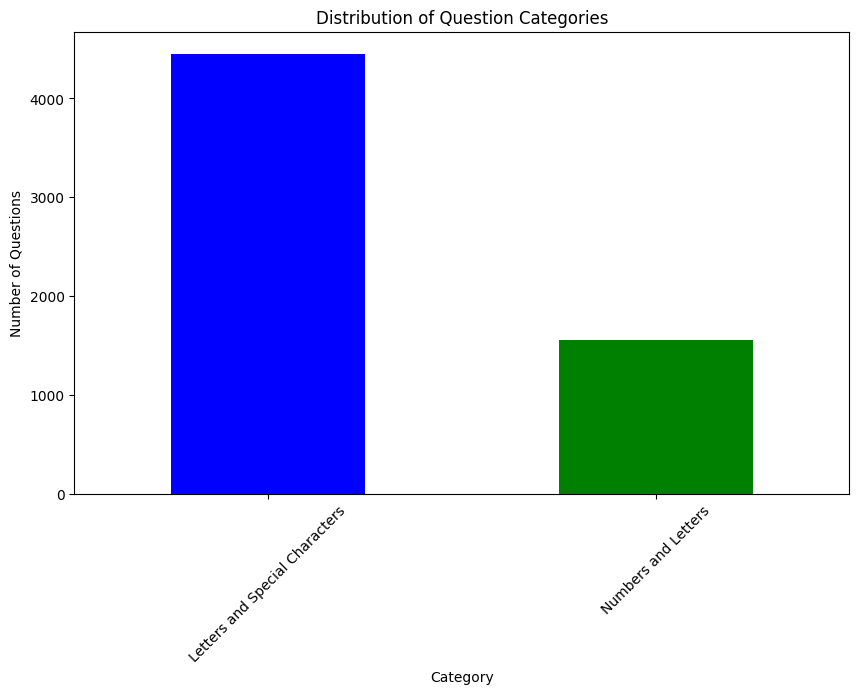

,Count,count
0,Letters and Special Characters,4454
1,Numbers and Letters,1557


In [11]:
import json
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import re

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Function to categorize questions
def categorize_question(question):
    if question.isdigit():
        return 'Only Numbers'
    elif bool(re.search(r'\d', question)) and bool(re.search(r'[a-zA-Z]', question)):
        return 'Numbers and Letters'
    elif bool(re.search(r'[a-zA-Z]', question)) and bool(re.search(r'[^\w\s]', question)):
        return 'Letters and Special Characters'
    elif bool(re.search(r'[a-zA-Z]', question)):
        return 'Only Letters'
    else:
        return 'Others'

# Apply the function to categorize the questions
df['question_category'] = df['question'].apply(categorize_question)

# Generate the statistics
category_counts = df['question_category'].value_counts()

# Plot the statistics
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Distribution of Question Categories')
plt.xlabel('Category')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45)
plt.show()

# Display the statistics as a HTML table
html_table = category_counts.reset_index().rename(columns={'index': 'Category', 'question_category': 'Count'}).to_html()
display(HTML(html_table))

category
Letters and Special Chars    2684
Only Numbers                 2442
Only Letters                  587
Numbers and Special Chars     149
Numbers and Letters           144
Other                           5
Name: count, dtype: int64


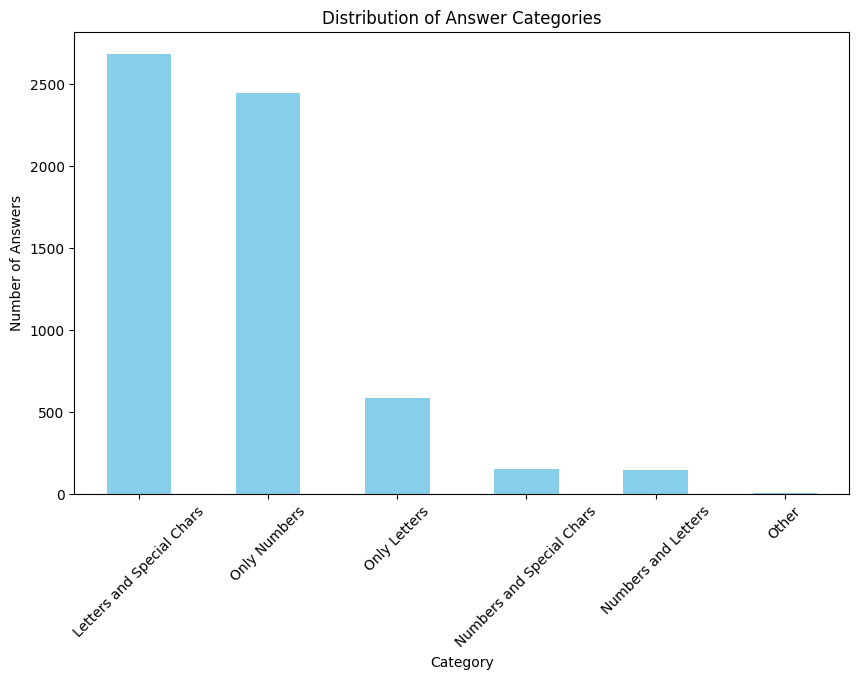

id,question,answer,category
339bfd44-a71f-4057-a8a2-c84e1cc2c6ff,What is the cited by count for the writer's institution who published the paper 'MAGMA: a multiagent architecture for metaheuristics'?,3335304,Only Numbers
85c79cd1-0c96-4efd-a5a8-3ade69885173,In which year did the author join Epic Games as an engineering fellow?,2021,Only Numbers
55d6d116-5fd7-4792-83e3-cecaeb3b35b9,How many citations are there for the institution to which the author of the paper 'Dynamic Knowledge Graph Construction for Zero-shot Commonsense Question Answering' belongs?,15409629,Only Numbers
96650ffc-e614-4d50-be21-a8a01827b695,"What is the i10Index of the researcher who published A Dynamic, Distributed, Hierarchical Load Balancing for HLA-Based Simulations on Large-Scale Environments in 2010 with Robson E. De Grande from Brock University, Canada?",402,Only Numbers
cda20ff7-b955-42ef-81d5-d18a8b4e49a7,"How many publications does the scientist at University of Maryland, College Park, USA and writer of Eigenanalysis of some preconditioned Helmholtz problems, have?",5,Only Numbers
f745ac07-b400-4480-93a1-c3ef241c8330,In which year did the author of Probabilistic Segmentation of the Lumen from Intravascular Ultrasound Radio Frequency Data receive their BSc degree?,1989,Only Numbers
0ecac8d6-02b3-4b40-83b6-57edaab0eddb,What is the number of publications for the affiliation of the researcher who published Averaging of Random Sets Based on Their Distance Functions?,63709,Only Numbers
1c44e85f-9c8f-4a7b-ab08-614b2dee755e,When did the author of High-Quality MRC Document Coding start teaching at Purdue University?,1989,Only Numbers
007a1979-f034-4deb-88be-ca81527f2eda,What is the hIndex of the author of Non-separating induced cycles in graphs?,52,Only Numbers
43a410c9-c07a-4e20-8e35-d9d54bf4cccf,How many articles are attributed to the affiliation in which the creator of 'Fortifying Your Defenses: Techniques to Thwart Adversarial Attacks and Boost Performance of Machine Learning-Based Intrusion Detection Systems' is working?,244139,Only Numbers


In [16]:
import json
import pandas as pd
from IPython.display import display, HTML
import re
import matplotlib.pyplot as plt

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Define functions to categorize answers
def is_only_numbers(answer):
    return re.fullmatch(r'^\d+$', answer) is not None

def is_only_letters(answer):
    return re.fullmatch(r'^[a-zA-Z]+$', answer) is not None

def is_numbers_and_letters(answer):
    return re.search(r'[a-zA-Z]', answer) is not None and re.search(r'\d', answer) is not None

def is_letters_and_special_chars(answer):
    return re.search(r'[a-zA-Z]', answer) is not None and re.search(r'\W', answer) is not None

def is_numbers_and_special_chars(answer):
    return re.search(r'\d', answer) is not None and re.search(r'\W', answer) is not None

# Apply functions to categorize answers
df['category'] = df['answer'].apply(
    lambda x: 'Only Numbers' if is_only_numbers(x) else
              'Only Letters' if is_only_letters(x) else
              'Numbers and Letters' if is_numbers_and_letters(x) else
              'Letters and Special Chars' if is_letters_and_special_chars(x) else
              'Numbers and Special Chars' if is_numbers_and_special_chars(x) else
              'Other'
)

# Calculate statistics
stats = df['category'].value_counts()

# Display statistics
print(stats)

# Plot statistics
plt.figure(figsize=(10, 6))
stats.plot(kind='bar', color='skyblue')
plt.title('Distribution of Answer Categories')
plt.xlabel('Category')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45)
plt.show()

# Show the first 10 entries of each category in a HTML table
categories = ['Only Numbers', 'Only Letters', 'Numbers and Letters', 'Letters and Special Chars', 'Numbers and Special Chars', 'Other']
html_tables = []

for category in categories:
    category_df = df[df['category'] == category].head(10)
    html_table = category_df[['id', 'question', 'answer', 'category']].to_html(index=False)
    html_tables.append(f"<h2>{category}</h2>" + html_table)

# Combine all tables into one HTML string
combined_html = ''.join(html_tables)
display(HTML(combined_html))

In [ ]:
!pip install bertopic keybert

In [19]:
import json
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Define a function to perform topic modeling using BERTopic
def perform_topic_modeling(texts, n_topics=10):
    # Create a BERTopic model
    topic_model = BERTopic(nr_topics=n_topics)
    topics, probs = topic_model.fit_transform(texts)
    return topic_model, topics, probs

# Extract questions and answers
questions = df['question'].tolist()
answers = df['answer'].tolist()

# Perform topic modeling on questions
question_topic_model, question_topics, question_probs = perform_topic_modeling(questions)

# Perform topic modeling on answers
answer_topic_model, answer_topics, answer_probs = perform_topic_modeling(answers)

# Display topics for questions
question_topics_df = pd.DataFrame(question_topic_model.get_topic_info())
display(question_topics_df)

# Display topics for answers
answer_topics_df = pd.DataFrame(answer_topic_model.get_topic_info())
display(answer_topics_df)

# Show examples of questions and their topics
df['question_topic'] = question_topics
question_examples = df[['question', 'question_topic']].head(10)
display(HTML(question_examples.to_html(index=False)))

# Show examples of answers and their topics
df['answer_topic'] = answer_topics
answer_examples = df[['answer', 'answer_topic']].head(10)
display(HTML(answer_examples.to_html(index=False)))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2124,-1_the_of_author_in,"[the, of, author, in, is, for, what, who, and,...",[What is the number of articles for the affili...
1,0,3742,0_the_of_author_in,"[the, of, author, in, is, what, who, and, for,...",[What is the cited by count where the academic...
2,1,61,1_of_the_for_author,"[of, the, for, author, robots, model, what, te...",[How many research papers does the academic in...
3,2,14,2_wormhole_traversable_frt2_admitting,"[wormhole, traversable, frt2, admitting, noeth...",[Where did the author of Traversable Wormhole ...
4,3,12,3_greiner_russell_patents_specialist,"[greiner, russell, patents, specialist, romani...",[How many refereed papers and patents has Russ...
5,4,12,4_nonpedestrian_forms_descriptors_locally,"[nonpedestrian, forms, descriptors, locally, r...",[What is the type of organization where the wr...
6,5,12,5_messagepassing_queueing_statespace_algebraic,"[messagepassing, queueing, statespace, algebra...",[What is the birth year of the contributor of ...
7,6,12,6_luca_florian_project_award,"[luca, florian, project, award, in, marco, sol...","[In which year was Florian Luca born?, What aw..."
8,7,11,7_spam_filtering_cbr_crm,"[spam, filtering, cbr, crm, technologies, appr...",[What kind of organization is the institute of...
9,8,11,8_lori_pollock_pollocks_best,"[lori, pollock, pollocks, best, acm, thesis, p...",[What was the title of Lori L. Pollock's thesi...


,Topic,Count,Name,Representation,Representative_Docs
0,-1,761,-1_and_of_university_for,"[and, of, university, for, the, technology, co...","[Indian Institute of Technology Kanpur, Indian..."
1,0,1869,0_117175_138671_383525_36,"[117175, 138671, 383525, 36, 60, 26, over, 18,...","[117175, 117175, 117175]"
2,1,1280,1_university_of_education_technology,"[university, of, education, technology, award,...","[California Institute of Technology, Universit..."
3,2,872,2_michael_david_stephen_professor,"[michael, david, stephen, professor, van, fell...","[Michael F. Goodchild, David Mazières, David M..."
4,3,576,3_2014_2021_2016_1997,"[2014, 2021, 2016, 1997, 2019, 2015, 2012, 201...","[2014, 2014, 2018-2021]"
5,4,444,4_company_american_canada_facility,"[company, american, canada, facility, germany,...","[Indian-American, Indian American, Chinese Ame..."
6,5,132,5_and_for_in_the,"[and, for, in, the, information, theory, data,...","[statistics, game theory, machine learning app..."
7,6,36,6_networks_mobile_wireless_and,"[networks, mobile, wireless, and, in, for, com...","[Authentication, Authorization and Accounting ..."
8,7,25,7_imaging_3d_and_time,"[imaging, 3d, and, time, using, from, shape, n...","[3D shape, texture, infrared, and time variabl..."
9,8,16,8_numerical_circuits_linear_nonlinear,"[numerical, circuits, linear, nonlinear, and, ...",[Computational and Numerical Challenges in Env...


question,question_topic
What type of information sources were found to be lacking in organized information at Social Services offices according to the author's observation?,-1
What is the cited by count for the writer's institution who published the paper 'MAGMA: a multiagent architecture for metaheuristics'?,-1
What was the focus of the author's undergraduate studies at Oberlin College?,0
Where did the author of SPAA 1999 - Guest Editors' Foreword receive a B.Tech degree from?,-1
In which year did the author join Epic Games as an engineering fellow?,0
How many citations are there for the institution to which the author of the paper 'Dynamic Knowledge Graph Construction for Zero-shot Commonsense Question Answering' belongs?,0
What is the type of organization where the author of the paper 'First order convergence and roots' works?,0
In which field is Russell Greiner a specialist?,3
"What is the i10Index of the researcher who published A Dynamic, Distributed, Hierarchical Load Balancing for HLA-Based Simulations on Large-Scale Environments in 2010 with Robson E. De Grande from Brock University, Canada?",0
From which university did the creator of Affect Modeling with Field-based Physiological Responses receive a Bachelor of Applied Science?,0


answer,answer_topic
oral communication and notes,1
3335304,0
probability and statistics,-1
"Indian Institute of Technology, Madras",1
2021,3
15409629,0
education,1
Machine learning and bioinformatics,5
402,0
Simon Fraser University,1


In [20]:
import json
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Function to perform topic modeling using BERTopic with TF-IDF
def perform_topic_modeling_with_tfidf(texts, n_topics=10):
    vectorizer_model = TfidfVectorizer(stop_words="english")
    topic_model = BERTopic(vectorizer_model=vectorizer_model, nr_topics=n_topics)
    topics, probs = topic_model.fit_transform(texts)
    return topic_model, topics, probs

# Extract questions and answers
questions = df['question'].tolist()
answers = df['answer'].tolist()

# Perform topic modeling on questions
question_topic_model, question_topics, question_probs = perform_topic_modeling_with_tfidf(questions)

# Perform topic modeling on answers
answer_topic_model, answer_topics, answer_probs = perform_topic_modeling_with_tfidf(answers)

# Display topics for questions
question_topics_df = pd.DataFrame(question_topic_model.get_topic_info())
display(question_topics_df)

# Display topics for answers
answer_topics_df = pd.DataFrame(answer_topic_model.get_topic_info())
display(answer_topics_df)

# Show examples of questions and their topics
df['question_topic'] = question_topics
question_examples = df[['question', 'question_topic']].head(10)
display(HTML(question_examples.to_html(index=False)))

# Show examples of answers and their topics
df['answer_topic'] = answer_topics
answer_examples = df[['answer', 'answer_topic']].head(10)
display(HTML(answer_examples.to_html(index=False)))

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2062,-1_author_publications_published_did,"[author, publications, published, did, hindex,...",[How many scientific articles are attributed t...
1,0,2687,0_author_published_i10index_publications,"[author, published, i10index, publications, un...",[From which institute did the contributor of t...
2,1,781,1_did_university_phd_computer,"[did, university, phd, computer, receive, prof...",[Where did the contributor who received a PhD ...
3,2,201,2_wireless_author_networks_multimedia,"[wireless, author, networks, multimedia, servi...",[What is the type of organization of the acade...
4,3,148,3_protein_author_prediction_dna,"[protein, author, prediction, dna, genome, mic...",[How many papers does the academic institution...
5,4,50,4_fuzzy_intuitionistic_neural_cellular,"[fuzzy, intuitionistic, neural, cellular, opti...",[Where did the author who published Stability ...
6,5,42,5_permanentmagnet_auctions_synchronous_bidding,"[permanentmagnet, auctions, synchronous, biddi...",[Where did the writer of 'Optimal current wave...
7,6,14,6_nonpedestrian_descriptors_recognition_forms,"[nonpedestrian, descriptors, recognition, form...",[What is the academic institution where the au...
8,7,14,7_lori_pollock_pollocks_best,"[lori, pollock, pollocks, best, automatically,...",[What was the title of Lori L. Pollock's thesi...
9,8,12,8_frchet_duals_frames_expansions,"[frchet, duals, frames, expansions, spaces, co...",[Which institute has the academician of the Se...


,Topic,Count,Name,Representation,Representative_Docs
0,-1,732,-1_university_institute_technology_kanpur,"[university, institute, technology, kanpur, 31...","[Indian Institute of Technology Kanpur, Indian..."
1,0,1817,0_117175_138671_383525_36,"[117175, 138671, 383525, 36, 60, 18, 41, 33, 4...","[117175, 117175, 117175]"
2,1,1382,1_university_education_institute_technology,"[university, education, institute, technology,...","[education, education, University of Wisconsin..."
3,2,797,2_michael_stephen_david_john,"[michael, stephen, david, john, van, mark, jam...","[Michael Brady, Michael T. Goodrich, Michael T..."
4,3,661,3_2021_2016_2014_1997,"[2021, 2016, 2014, 1997, 2019, 2012, 2015, 201...","[2021, 2018-2021, 2015-2017]"
5,4,381,4_canada_california_chinese_american,"[canada, california, chinese, american, canadi...","[Chinese American, Chinese and Canadian, Chine..."
6,5,154,5_award_ieee_medal_acm,"[award, ieee, medal, acm, prize, fellow, found...","[National Science Foundation CAREER Award, Nat..."
7,6,38,6_mobile_networks_wireless_ad,"[mobile, networks, wireless, ad, hoc, communic...","[Authentication, Authorization and Accounting ..."
8,7,29,7_3d_time_noninvasive_variables,"[3d, time, noninvasive, variables, infrared, t...","[3D shape, texture, infrared, and time variabl..."
9,8,20,8_numerical_circuits_series_linear,"[numerical, circuits, series, linear, nonlinea...",[Volterra series descriptions of nonlinear cir...


question,question_topic
What type of information sources were found to be lacking in organized information at Social Services offices according to the author's observation?,-1
What is the cited by count for the writer's institution who published the paper 'MAGMA: a multiagent architecture for metaheuristics'?,0
What was the focus of the author's undergraduate studies at Oberlin College?,1
Where did the author of SPAA 1999 - Guest Editors' Foreword receive a B.Tech degree from?,0
In which year did the author join Epic Games as an engineering fellow?,1
How many citations are there for the institution to which the author of the paper 'Dynamic Knowledge Graph Construction for Zero-shot Commonsense Question Answering' belongs?,0
What is the type of organization where the author of the paper 'First order convergence and roots' works?,0
In which field is Russell Greiner a specialist?,-1
"What is the i10Index of the researcher who published A Dynamic, Distributed, Hierarchical Load Balancing for HLA-Based Simulations on Large-Scale Environments in 2010 with Robson E. De Grande from Brock University, Canada?",0
From which university did the creator of Affect Modeling with Field-based Physiological Responses receive a Bachelor of Applied Science?,0


answer,answer_topic
oral communication and notes,-1
3335304,0
probability and statistics,1
"Indian Institute of Technology, Madras",1
2021,3
15409629,0
education,1
Machine learning and bioinformatics,1
402,0
Simon Fraser University,1


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.2 MB/s eta 0:00:00a 0:00:01


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2100,-1_author_published_publications_paper,"[author, published, publications, paper, hinde...",[Which author has more publications cited by c...
1,0,3694,0_author_published_i10index_university,"[author, published, i10index, university, did,...",[What is the works count of the researcher wit...
2,1,96,1_did_professor_university_jouannaud,"[did, professor, university, jouannaud, jeanpi...",[In which country is Florian Luca currently a ...
3,2,27,2_data_control_landed_multispectral,"[data, control, landed, multispectral, visible...",[What is the number of papers for the academic...
4,3,22,3_ultrasound_doctor_signal_processing,"[ultrasound, doctor, signal, processing, monit...",[Where was the doctor in signal processing bor...
5,4,18,4_auctions_bidding_strategies_power,"[auctions, bidding, strategies, power, online,...",[How many articles are attributed to the insti...
6,5,16,5_problem_vanishing_recurrent_neural,"[problem, vanishing, recurrent, neural, nets, ...",[What prize did the author of 'The Vanishing G...
7,6,14,6_lori_pollock_pollocks_best,"[lori, pollock, pollocks, best, bs, acm, autom...",[What was the title of Lori L. Pollock's thesi...
8,7,12,7_nonpedestrian_descriptors_forms_human,"[nonpedestrian, descriptors, forms, human, rec...",[What is the nationality of the author of Reco...
9,8,12,8_frchet_duals_frames_expansions,"[frchet, duals, frames, expansions, spaces, se...",[Which institute has the academician of the Se...


,Topic,Count,Name,Representation,Representative_Docs
0,-1,717,-1_university_architecture_science_phd,"[university, architecture, science, phd, compu...","[Robert Sugden, Robert Sugden, Missouri Univer..."
1,0,1856,0_117175_138671_383525_36,"[117175, 138671, 383525, 36, 60, 18, 33, 39, 4...","[117175, 117175, 117175]"
2,1,1401,1_university_education_technology_institute,"[university, education, technology, institute,...","[University of Wisconsin–Madison, University o..."
3,2,770,2_michael_david_stephen_van,"[michael, david, stephen, van, john, mary, tho...","[Stephen S.-T. Yau, Ursula van Rienen, David M..."
4,3,664,3_2014_2021_2016_1997,"[2014, 2021, 2016, 1997, 2019, 2015, 2012, 201...","[2018-2021, 2018-2021, 2014, 2015 and 2016]"
5,4,394,4_california_american_chinese_germany,"[california, american, chinese, germany, canad...","[Chinese and Canadian, Chinese and Canadian, C..."
6,5,100,5_programming_theory_information_editorinchief,"[programming, theory, information, editorinchi...",[novel contributions to differentially private...
7,6,48,6_bioinformatics_imaging_interaction_receptorl...,"[bioinformatics, imaging, interaction, recepto...",[Dorothy Foehr Huck and J. Lloyd Huck Chair in...
8,7,41,7_wireless_mobile_networks_ad,"[wireless, mobile, networks, ad, hoc, communic...","[Authentication, Authorization and Accounting ..."
9,8,20,8_numerical_circuits_series_linear,"[numerical, circuits, series, linear, nonlinea...",[Volterra series descriptions of nonlinear cir...


question,question_topic
What type of information sources were found to be lacking in organized information at Social Services offices according to the author's observation?,-1
What is the cited by count for the writer's institution who published the paper 'MAGMA: a multiagent architecture for metaheuristics'?,-1
What was the focus of the author's undergraduate studies at Oberlin College?,0
Where did the author of SPAA 1999 - Guest Editors' Foreword receive a B.Tech degree from?,0
In which year did the author join Epic Games as an engineering fellow?,0
How many citations are there for the institution to which the author of the paper 'Dynamic Knowledge Graph Construction for Zero-shot Commonsense Question Answering' belongs?,0
What is the type of organization where the author of the paper 'First order convergence and roots' works?,0
In which field is Russell Greiner a specialist?,0
"What is the i10Index of the researcher who published A Dynamic, Distributed, Hierarchical Load Balancing for HLA-Based Simulations on Large-Scale Environments in 2010 with Robson E. De Grande from Brock University, Canada?",0
From which university did the creator of Affect Modeling with Field-based Physiological Responses receive a Bachelor of Applied Science?,-1


answer,answer_topic
oral communication and notes,5
3335304,0
probability and statistics,-1
"Indian Institute of Technology, Madras",1
2021,3
15409629,0
education,1
Machine learning and bioinformatics,6
402,0
Simon Fraser University,1


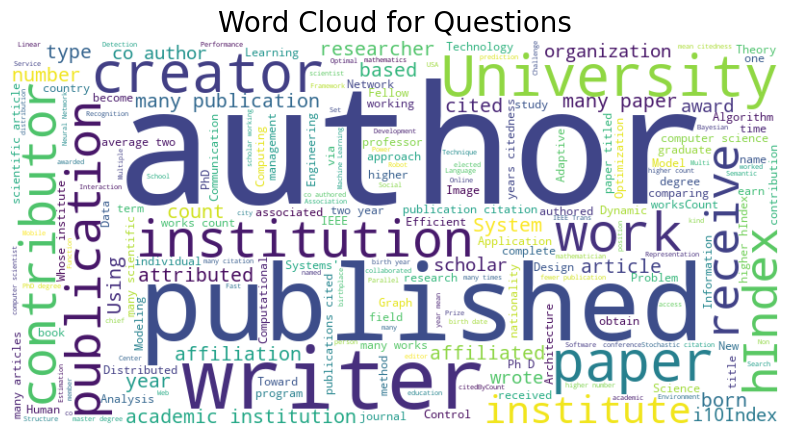

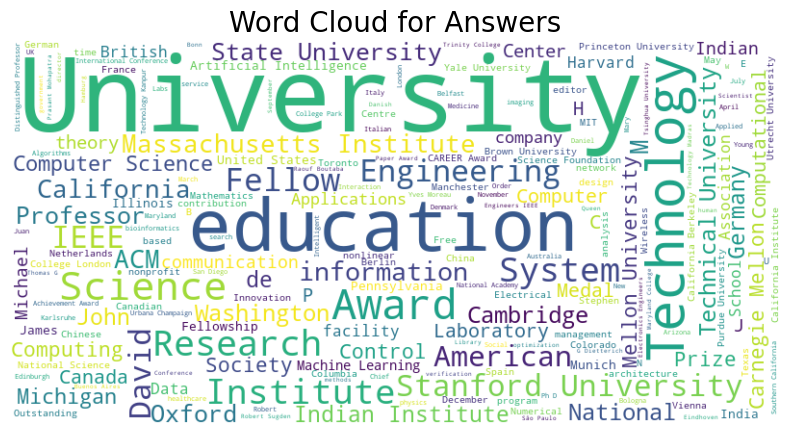

Keywords for Questions:
publications bibliometrics bibliometric scholar journals biographical researcher researchers publishes researchsoft
Keywords for Answers:
bioinformatics algorithmics agriculture bioengineering probabilistic computational computing learning algorithmic crop


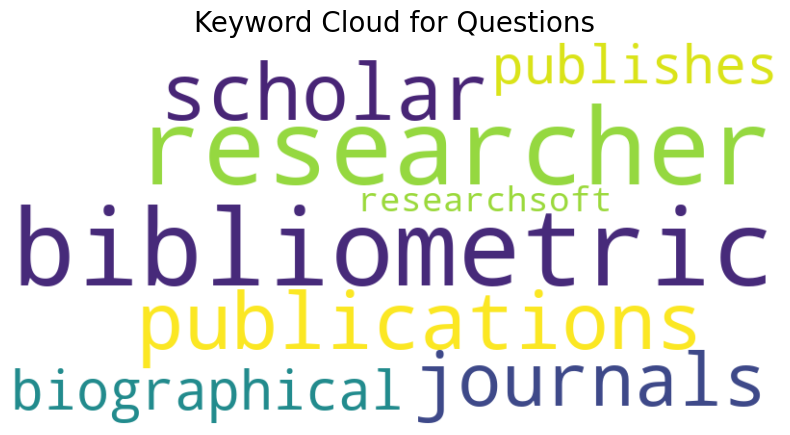

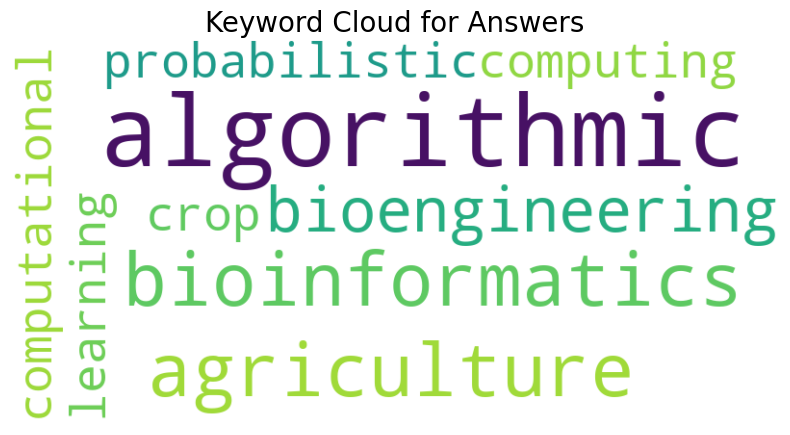

In [26]:
import json
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer
from keybert import KeyBERT
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Function to perform topic modeling using BERTopic with TF-IDF
def perform_topic_modeling_with_tfidf(texts, n_topics=10):
    vectorizer_model = TfidfVectorizer(stop_words="english")
    topic_model = BERTopic(vectorizer_model=vectorizer_model, nr_topics=n_topics)
    topics, probs = topic_model.fit_transform(texts)
    return topic_model, topics, probs

# Function to generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Function to extract keywords using KeyBERT
def extract_keywords(texts, n_keywords=10):
    kw_model = KeyBERT()
    keywords = kw_model.extract_keywords(' '.join(texts), keyphrase_ngram_range=(1, 1), stop_words='english', top_n=n_keywords)
    return ' '.join([kw[0] for kw in keywords])

# Extract questions and answers
questions = df['question'].tolist()
answers = df['answer'].tolist()

# Perform topic modeling on questions
question_topic_model, question_topics, question_probs = perform_topic_modeling_with_tfidf(questions)

# Perform topic modeling on answers
answer_topic_model, answer_topics, answer_probs = perform_topic_modeling_with_tfidf(answers)

# Display topics for questions
question_topics_df = pd.DataFrame(question_topic_model.get_topic_info())
display(question_topics_df)

# Display topics for answers
answer_topics_df = pd.DataFrame(answer_topic_model.get_topic_info())
display(answer_topics_df)

# Show examples of questions and their topics
df['question_topic'] = question_topics
question_examples = df[['question', 'question_topic']].head(10)
display(HTML(question_examples.to_html(index=False)))

# Show examples of answers and their topics
df['answer_topic'] = answer_topics
answer_examples = df[['answer', 'answer_topic']].head(10)
display(HTML(answer_examples.to_html(index=False)))

# Generate word clouds for questions and answers
questions_text = ' '.join(questions)
answers_text = ' '.join(answers)

generate_word_cloud(questions_text, 'Word Cloud for Questions')
generate_word_cloud(answers_text, 'Word Cloud for Answers')

# Extract and display keywords
question_keywords = extract_keywords(questions)
answer_keywords = extract_keywords(answers)

print("Keywords for Questions:")
print(question_keywords)

print("Keywords for Answers:")
print(answer_keywords)

generate_word_cloud(question_keywords, 'Keyword Cloud for Questions')
generate_word_cloud(answer_keywords, 'Keyword Cloud for Answers')

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1832,-1_author_publications_published_hindex,"[author, publications, published, hindex, univ...",[How many publications are there for the affil...
1,0,4051,0_author_university_i10index_published,"[author, university, i10index, published, did,...",[In which country was the author of Fuzzy lear...
2,1,26,1_tunnex_wormhole_frt2_noether,"[tunnex, wormhole, frt2, noether, admitting, t...",[Where did the author of Traversable Wormhole ...
3,2,24,2_spam_forensics_filtering_media,"[spam, forensics, filtering, media, deepfakes,...",[What kind of organization is the institute of...
4,3,19,3_auctions_bidding_citizenship_strategies,"[auctions, bidding, citizenship, strategies, p...",[How many publication citations does the insti...
5,4,12,4_nonpedestrian_recognition_descriptors_forms,"[nonpedestrian, recognition, descriptors, form...",[What is the nationality of the author of Reco...
6,5,12,5_lori_pollock_bs_acm,"[lori, pollock, bs, acm, pollocks, automatical...",[In which year did Lori L. Pollock become an A...
7,6,12,6_permanentmagnet_machine_synchronous_current,"[permanentmagnet, machine, synchronous, curren...",[Where did the writer of 'Optimal current wave...
8,7,12,7_florian_luca_project_award,"[florian, luca, project, award, derek, ecolead...","[In which year was Florian Luca born?, What aw..."
9,8,11,8_frchet_duals_frames_expansions,"[frchet, duals, frames, expansions, spaces, se...",[Which institute has the academician of the Se...


,Topic,Count,Name,Representation,Representative_Docs
0,-1,906,-1_university_institute_national_technology,"[university, institute, national, technology, ...","[Indian Institute of Technology Kanpur, Indian..."
1,0,1752,0_117175_138671_383525_36,"[117175, 138671, 383525, 36, 60, 18, 43, 85692...","[117175, 117175, 117175]"
2,1,1341,1_university_education_technology_award,"[university, education, technology, award, ins...","[education, University of Wisconsin-Madison, e..."
3,2,809,2_michael_stephen_david_van,"[michael, stephen, david, van, mark, mary, tho...","[Michael T. Goodrich, Michael F. Goodchild, Mi..."
4,3,642,3_2014_2021_2016_1997,"[2014, 2021, 2016, 1997, 2019, 2012, 2015, 201...","[2014, 2014, 2014, 2015 and 2016]"
5,4,346,4_california_germany_china_american,"[california, germany, china, american, boston,...","[Indian American, Indian-American, China, the ..."
6,5,150,5_data_programming_information_search,"[data, programming, information, search, edito...",[novel contributions to differentially private...
7,6,34,6_mobile_networks_wireless_ad,"[mobile, networks, wireless, ad, hoc, communic...","[Authentication, Authorization and Accounting ..."
8,7,18,7_numerical_series_circuits_linear,"[numerical, series, circuits, linear, nonlinea...",[Volterra series descriptions of nonlinear cir...
9,8,13,8_fellow_acm_communications_distinguished,"[fellow, acm, communications, distinguished, s...","[Fellow of the ACM, Fellow of the ACM, ACM Fel..."


question,question_topic
What type of information sources were found to be lacking in organized information at Social Services offices according to the author's observation?,0
What is the cited by count for the writer's institution who published the paper 'MAGMA: a multiagent architecture for metaheuristics'?,-1
What was the focus of the author's undergraduate studies at Oberlin College?,-1
Where did the author of SPAA 1999 - Guest Editors' Foreword receive a B.Tech degree from?,2
In which year did the author join Epic Games as an engineering fellow?,-1
How many citations are there for the institution to which the author of the paper 'Dynamic Knowledge Graph Construction for Zero-shot Commonsense Question Answering' belongs?,0
What is the type of organization where the author of the paper 'First order convergence and roots' works?,0
In which field is Russell Greiner a specialist?,0
"What is the i10Index of the researcher who published A Dynamic, Distributed, Hierarchical Load Balancing for HLA-Based Simulations on Large-Scale Environments in 2010 with Robson E. De Grande from Brock University, Canada?",0
From which university did the creator of Affect Modeling with Field-based Physiological Responses receive a Bachelor of Applied Science?,0


answer,answer_topic
oral communication and notes,-1
3335304,0
probability and statistics,5
"Indian Institute of Technology, Madras",1
2021,3
15409629,0
education,1
Machine learning and bioinformatics,5
402,0
Simon Fraser University,1


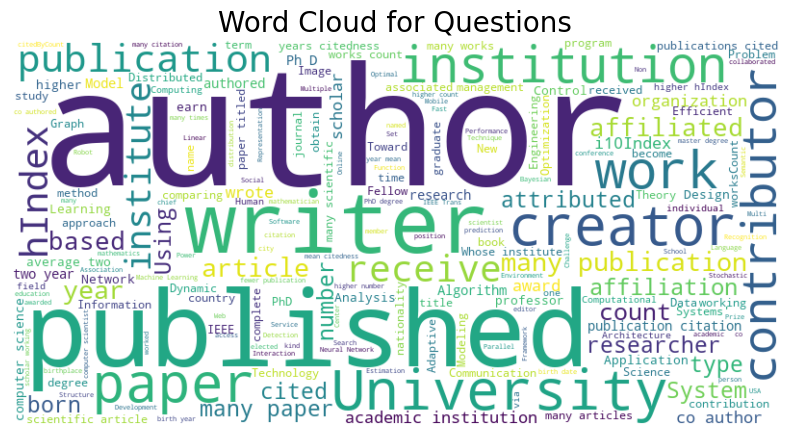

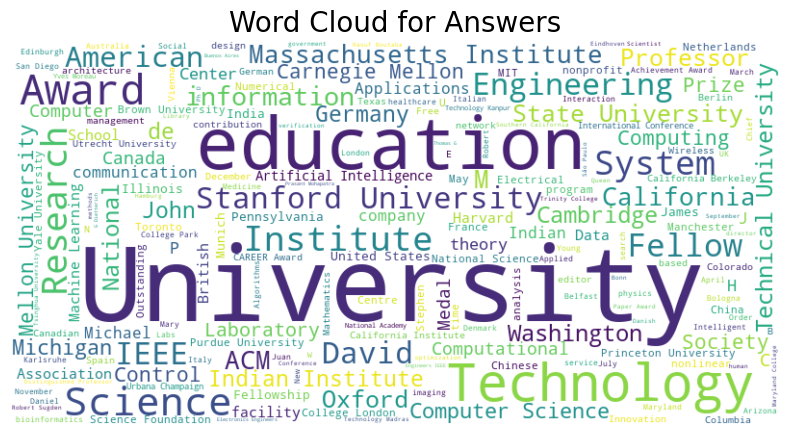

Keyphrases for Questions:
data papers attributed academic big papers attributed author institution publications attributed academic papers associated academic organization author attributed academic institution researcher published attributed institution author information systems articles attributed institution author prospects information scientific papers attributed institution papers attributed academic institution researcher information institute did scholar authored
Keyphrases for Answers:
crop soil sciences professor 2016 15409629 education machine learning bioinformatics 263 department crop soil sciences education machine learning bioinformatics 402 education machine learning bioinformatics crop soil sciences education soil sciences education indian 238693 department crop soil sciences education bioinformatics laboratory artificial intelligence university crop soil sciences education indian


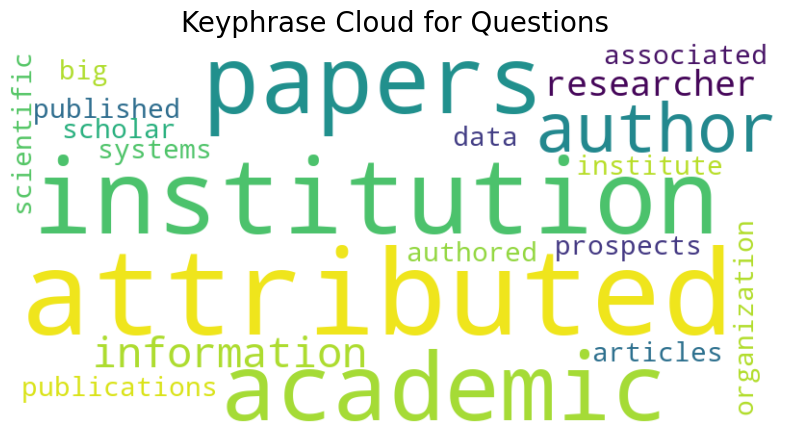

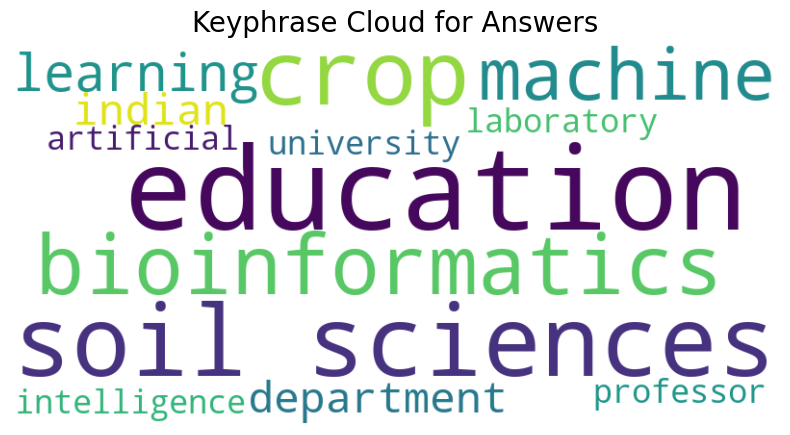

In [28]:
import json
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer
from keybert import KeyBERT
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load new json file
file_path = '../../../src/features/noise_reduction/generate_spaql/datasets/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Function to perform topic modeling using BERTopic with TF-IDF
def perform_topic_modeling_with_tfidf(texts, n_topics=10):
    vectorizer_model = TfidfVectorizer(stop_words="english")
    topic_model = BERTopic(vectorizer_model=vectorizer_model, nr_topics=n_topics)
    topics, probs = topic_model.fit_transform(texts)
    return topic_model, topics, probs

# Function to generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Function to extract keyphrases using KeyBERT
def extract_keyphrases(texts, n_keywords=10, ngram_range=(1, 2)):
    kw_model = KeyBERT()
    keyphrases = kw_model.extract_keywords(' '.join(texts), keyphrase_ngram_range=ngram_range, stop_words='english', top_n=n_keywords)
    return ' '.join([kw[0] for kw in keyphrases])

# Extract questions and answers
questions = df['question'].tolist()
answers = df['answer'].tolist()

# Perform topic modeling on questions
question_topic_model, question_topics, question_probs = perform_topic_modeling_with_tfidf(questions)

# Perform topic modeling on answers
answer_topic_model, answer_topics, answer_probs = perform_topic_modeling_with_tfidf(answers)

# Display topics for questions
question_topics_df = pd.DataFrame(question_topic_model.get_topic_info())
display(question_topics_df)

# Display topics for answers
answer_topics_df = pd.DataFrame(answer_topic_model.get_topic_info())
display(answer_topics_df)

# Show examples of questions and their topics
df['question_topic'] = question_topics
question_examples = df[['question', 'question_topic']].head(10)
display(HTML(question_examples.to_html(index=False)))

# Show examples of answers and their topics
df['answer_topic'] = answer_topics
answer_examples = df[['answer', 'answer_topic']].head(10)
display(HTML(answer_examples.to_html(index=False)))

# Generate word clouds for questions and answers
questions_text = ' '.join(questions)
answers_text = ' '.join(answers)

generate_word_cloud(questions_text, 'Word Cloud for Questions')
generate_word_cloud(answers_text, 'Word Cloud for Answers')

# Extract and display keyphrases
question_keyphrases = extract_keyphrases(questions, ngram_range=(1, 5))
answer_keyphrases = extract_keyphrases(answers, ngram_range=(1, 5))

print("Keyphrases for Questions:")
print(question_keyphrases)

print("Keyphrases for Answers:")
print(answer_keyphrases)

generate_word_cloud(question_keyphrases, 'Keyphrase Cloud for Questions')
generate_word_cloud(answer_keyphrases, 'Keyphrase Cloud for Answers')